In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv('datasets_/GoodReads_100k_books.csv')

In [3]:
df.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


In [4]:
df.describe()

,pages,rating,reviews,totalratings
count,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,255.010240,3.833055,181.528450,2.990764e+03
std,367.913582,0.621237,1449.451229,3.635338e+04
min,0.000000,0.000000,0.000000,0.000000e+00
25%,135.000000,3.660000,3.000000,3.100000e+01
50%,240.000000,3.910000,15.000000,1.460000e+02
75%,336.000000,4.140000,67.000000,7.440000e+02
max,70000.000000,5.000000,158776.000000,3.819326e+06


In [48]:
df.isnull().sum()

author              0
bookformat       3228
desc             6772
genre           10467
img              3045
isbn            14482
isbn13          11435
link                0
pages               0
rating              0
reviews             0
title               1
totalratings        0
dtype: int64

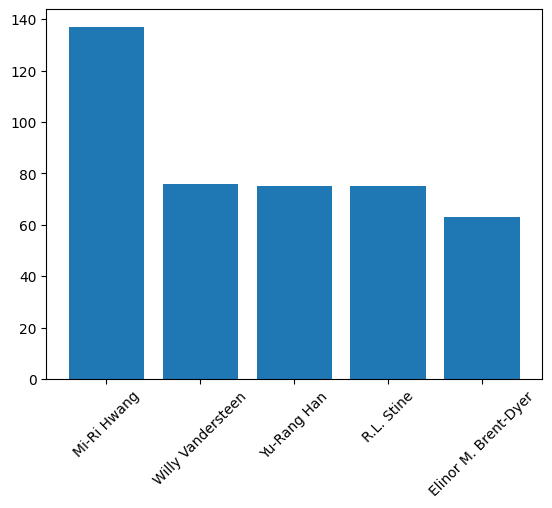

In [5]:
#Author with most of books
auth = df['author'].value_counts().head(5)
plt.bar(auth.index, auth.values)
plt.xticks(rotation = 45)
plt.show()

In [6]:
genre = df['genre'].dropna()

In [7]:
#splitting as some books got more than an genre
genre_split = []
for gen in genre:
    genre_split.append(gen.split(','))


def flatten(a):
    res = []
    for x in a:
        if isinstance(x, list):
            res.extend(flatten(x))  # Recursively flatten nested lists
        else:
            res.append(x)  # Append individual elements
    return res

gen_flat = flatten(genre_split)

In [8]:
gen_collection = Counter(gen_flat) # converting the title 

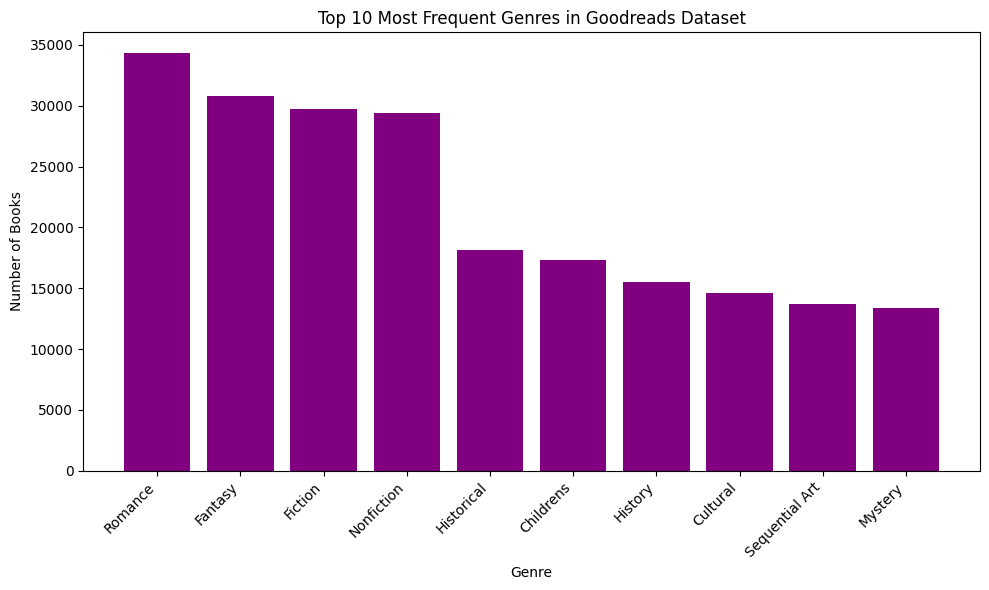

In [9]:
top_10_genres = gen_collection.most_common(10)

# Convert to DataFrame for plotting
top_10_df = pd.DataFrame(top_10_genres, columns=['Genre', 'Count'])

# Plot the top 10 most frequent genres
plt.figure(figsize=(10, 6))
plt.bar(top_10_df['Genre'], top_10_df['Count'], color='purple')
plt.title("Top 10 Most Frequent Genres in Goodreads Dataset")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
df_sorted = df[['title','totalratings','genre']].sort_values(ascending=False,by='totalratings')

In [11]:
def find_first(df,word):
    for i,sentence in enumerate(df['genre']):
        if word in sentence:
            return df['title'].loc[i]

In [12]:
#Most popular books by genre
for i in range(10):
    print(f'Genre : {top_10_genres[i][0]} , Name :',find_first(df_sorted, top_10_genres[i][0]),'\n')

Genre : Romance , Name : Between Two Fires: American Indians in the Civil War 

Genre : Fantasy , Name : Fashion Sourcebook 1920s 

Genre : Fiction , Name : Between Two Fires: American Indians in the Civil War 

Genre : Nonfiction , Name : Character Strengths and Virtues: A Handbook and Classification 

Genre : Historical , Name : The Books of Contemplation: Medieval Jewish Mystical Sources 

Genre : Childrens , Name : Hungary 56 

Genre : History , Name : Character Strengths and Virtues: A Handbook and Classification 

Genre : Cultural , Name : Anarchism And Ecology 

Genre : Sequential Art , Name : The Preservationist 

Genre : Mystery , Name : Hawaii: An Uncommon History 



In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
Tfidf = TfidfVectorizer()
genres = df[['genre','title']].dropna()
genres_transformed = Tfidf.fit_transform(genres['genre'])


In [35]:
tfidf_df = pd.DataFrame(genres_transformed.toarray(), columns=Tfidf.get_feature_names_out())

tfidf_df.to_csv("tfidf_genre_matrix.csv", index=False)


In [15]:
target_book = df['title'].loc[1]
book_index = df[df['title'] == target_book].index[0]

similarities = cosine_similarity(genres_transformed[book_index], genres_transformed).flatten()

similar_books = pd.DataFrame({
    'title': genres['title'],
    'similarity': similarities
}).sort_values(by='similarity', ascending=False)

print(f"Books similar to '{target_book}':")
print(similar_books[similar_books['title'] != target_book])

Books similar to 'Fashion Sourcebook 1920s':
                                                   title  similarity
90602        50s Fashion: Vintage Fashion and Beauty Ads    1.000000
31581               Extreme Beauty: The Body Transformed    0.963344
72850                                    Mode In Costume    0.963344
23525    Fashion Illustration: Inspiration and Technique    0.952457
11879    Pulp Fashion: The Art of Isabelle de Borchgrave    0.952457
...                                                  ...         ...
63                            Web Design on a Shoestring    0.000000
48619                                  The Deputy's Duty    0.000000
48620                                 The Sheikh's Jewel    0.000000
99948  Cheers to Vegan Sweets!: Drink-Inspired Vegan ...    0.000000
60                            The Pony and the Lost Swan    0.000000

[89531 rows x 2 columns]


In [16]:
genres.head(5)

,genre,title
0,"History,Military History,Civil War,American Hi...",Between Two Fires: American Indians in the Civ...
1,"Couture,Fashion,Historical,Art,Nonfiction",Fashion Sourcebook 1920s
2,"Politics,History",Hungary 56
3,"Labor,History",All-American Anarchist: Joseph A. Labadie and ...
5,"Business,Leadership,Romance,Historical Romance...",The Human Equation: Building Profits by Puttin...


In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score



# Function to get recommendations
def get_content_based_recommendations(input_genre, top_n=5):
    """
    Get top N book recommendations based on genre similarity using TF-IDF

    Args:
        input_genre (str): Genre to base recommendations on
        top_n (int): Number of recommendations to return

    Returns:
        pd.DataFrame: DataFrame with recommended books and their similarity scores
    """
    # Create TF-IDF matrix
    tfidf = TfidfVectorizer()
    # Apply the vectorizer to the genre column
    genres_cleaned = genres['genre'].str.replace(",", " ")
    genres_transformed = tfidf.fit_transform(genres_cleaned)

    # Transform input genre.  Handles multiple input genres
    input_genre_cleaned = input_genre.replace(",", " ")
    input_vector = tfidf.transform([input_genre_cleaned])   # Calculate similarities
    
    similarities = cosine_similarity(input_vector, genres_transformed).flatten()

    # Get top similar books
    similar_books = pd.DataFrame({
        'title': genres['title'],
        'similarity': similarities
    }).sort_values(by='similarity', ascending=False)

    return similar_books


def evaluate_recommendations(input_genre, test_books, top_n=5):
    """
    Evaluate the recommendation system using precision, recall, and F1-score

    Args:
        input_genre (str): Genre to test
        test_books (list): List of books known to belong to this genre
        top_n (int): Number of recommendations to consider

    Returns:
        dict: Evaluation metrics (precision, recall, f1)
    """
    # Get recommendations
    recommendations = get_content_based_recommendations(input_genre)
    recommended_books = recommendations['title'].tolist()

    # Calculate true positives (books that were recommended AND are in test_books)
    tp = len(set(recommended_books) & set(test_books))

    # Calculate false positives (books that were recommended but NOT in test_books)
    fp = len(set(recommended_books) - set(test_books))

    # Calculate false negatives (books in test_books that weren't recommended)
    fn = len(set(test_books) - set(recommended_books))

    # Calculate metrics
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'true_positives': tp,
        'false_positives': fp,
        'false_negatives': fn
    }


# Example usage:
if __name__ == "__main__":
    total_precision = 0
    total_recall    = 0
    total_f1_score  = 0
    # Example 1: Get recommendations
    input_genre = [] # User input genre
    for i in range (10):
        input_genre.append(top_10_genres[i][0])
    for i in input_genre:
        recommendations = get_content_based_recommendations(i)
        print(f"Top 5 recommended books for genre '{i}':")
        print(recommendations.head(5))

        # Example 2: Evaluate the system
        # For evaluation, we need some test books known to belong to the genre
        # In a real scenario, this would come from user data or test sets
        test_books = genres[genres['genre'].str.contains(i, case=False)]['title'].tolist()
        metrics = evaluate_recommendations(i, test_books)
        total_precision += metrics['precision']
        total_recall    += metrics['recall']
        total_f1_score  += metrics['f1_score']


Top 5 recommended books for genre 'Romance':
                                    title  similarity
70239               In Bed with the Enemy         1.0
70760                     His Best Friend         1.0
70791                        Madam's Room         1.0
41676  Campus Girl: Pearl, The Sweetheart         1.0
30389                    Lone Star Marine         1.0
Top 5 recommended books for genre 'Fantasy':
                                                   title  similarity
51291                                           Wayfarer         1.0
38754  Articles on the Southern Vampire Mysteries, In...         1.0
30799                                       Fate's Trick         1.0
55421                                  PÃ©talos de papel         1.0
55730                                The Poisoner's Game         1.0
Top 5 recommended books for genre 'Fiction':
                                                   title  similarity
63275                                          Ancestors  

In [18]:
print(f"Average precision of Top10 Genres : {total_precision/10}")
print(f"Average Recall of Top10 Genres : {total_recall/10}")
print(f"Average F1 score of Top10 Genres : {total_f1_score/10}")

Average precision of Top10 Genres : 0.2117721852483992
Average Recall of Top10 Genres : 1.0
Average F1 score of Top10 Genres : 0.31884197693883143


**Insights**

- **From the Recall**  
  The system is good at suggesting movies the user is likely to enjoy.

- **From the Precision**  
  The system is bad at finding most of the movies a user would like.
